In [8]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
df = pd.read_csv("Dataset/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
x = df.drop(["quality", "Id"], axis=1)
y = df["quality"]

In [11]:
x_train, x_test, y_train, y_test, = train_test_split(
    x,y, test_size=0.2, random_state=0, stratify=y
)

In [12]:
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=0
)

model.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
joblib.dump(acc, "ACCID3Wine.pkl")

print("Accuracy:",acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5720524017467249

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.66      0.64      0.65        97
           6       0.56      0.67      0.61        92
           7       0.33      0.24      0.28        29
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.26      0.26      0.26       229
weighted avg       0.55      0.57      0.56       229


Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  2 62 26  7  0]
 [ 0  1 24 62  5  0]
 [ 0  0  3 19  7  0]
 [ 0  0  0  1  2  0]]


c:\Users\nande\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nande\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nande\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

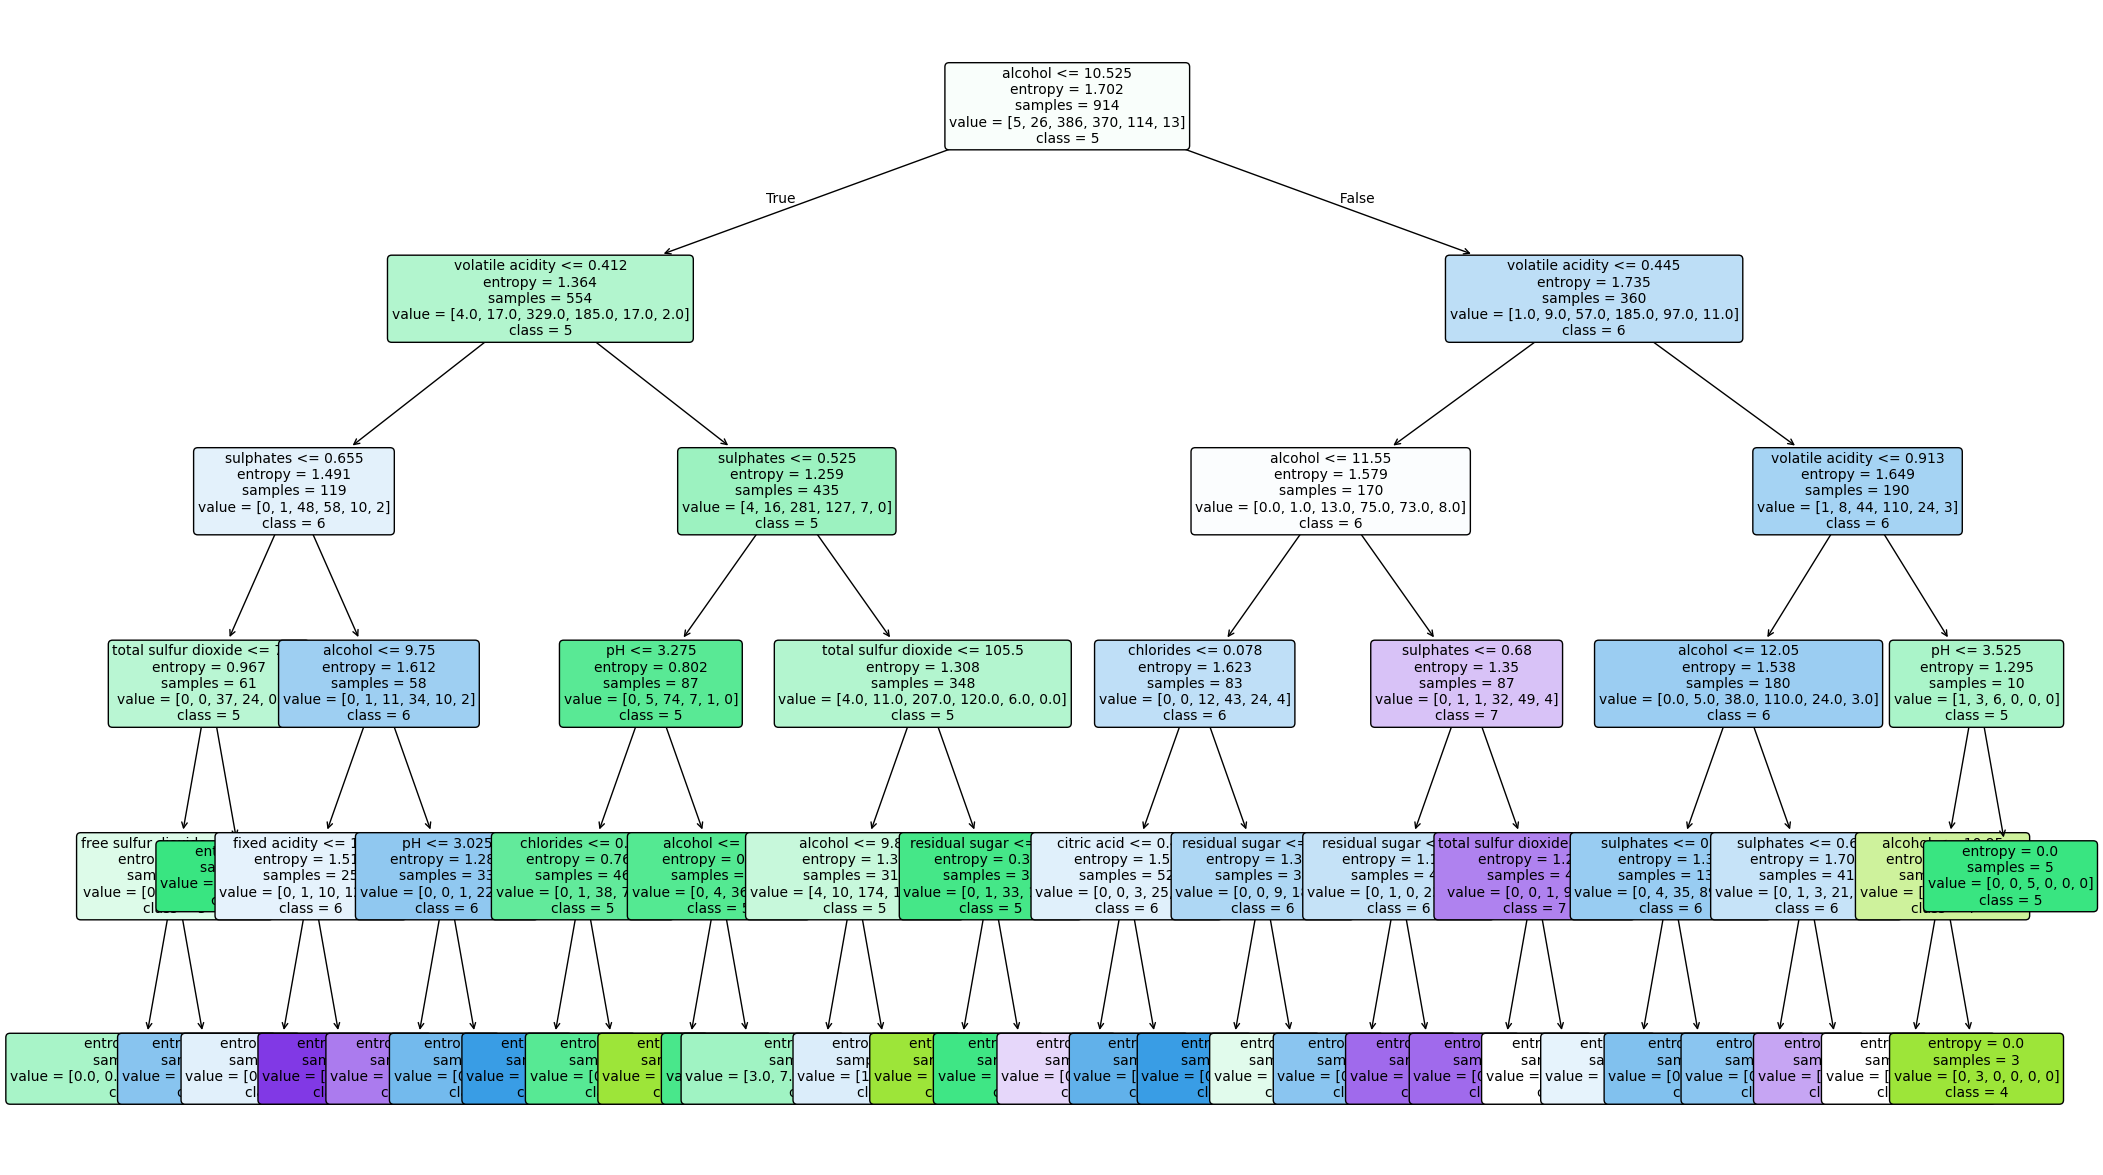

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(25, 15))
tree.plot_tree(
    model,
    feature_names=x.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()